# 연관분석

## 네이버 지식인 데이터로 크롤링해서 단어 추천하기

In [1]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "association_analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
        
import warnings
warnings.filterwarnings(action='ignore')

In [25]:
from bs4 import BeautifulSoup
import urllib
import time
import requests
from tqdm import tqdm_notebook

present_candi_text = [] # 문자열 저장할 리스트 

html = 'https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=데이터분석&start='
for n in range(1, 1000, 10):
    target=html+str(n)
    response = requests.get(target)
    soup = BeautifulSoup(response.text, "html.parser")
    tmp = soup.select('div.question_area > div.question_group > a')
    for line in tmp:
        #print(line.text)
        present_candi_text.append(line.text)
    time.sleep(0.5)
for i in present_candi_text:
    print(i)

컴활 못하는데 데이터분석가 데이터분석가로 직무전환하려고 마음먹었는데요 그전에 컴활 1급 실기 따놓으려고 2~3달 공부하고 6번 시험봤는데 다 떨어졌네요 진짜 하루종일 공부했는데.. 데이터분석 국비지원 신청해두었는데 컴활이 이러니 용기가 안생겨요. 컴활 못해도 데이터분석은 할 수 있을까요?
빅데이터 분석가 고3 학과 고민중인데 인공지능학과에서 빅데이터 분석가를 준비해도 괜찮을까요? 원래 통계학과를 가려했지만 교육과정을 보니 인공지능학과가 저에게 더 맞겠더라고요. 인공지능 시스템을 만들기 보다는 데이터를 가지고 의사소통하는 걸 꿈꾸고 있어요. 데이터학과도 알아봤는데 많이 없더라구요
빅데이터 분석기사 일본 취업 빅데이터 분석기사, 사회조사분석사 2급을 취득하면 일본 취업에 있어서 유용할까요? 의미가 없을까요? 안된다면 일본의 비슷한 자격증을 소개해주시면 감사하겠습니다
빅데이터분석기사 자격증을 준비하려는데요. 아무 지식이 없어서 도움을 얻고자 합니다. 빅데이터분석기사 자격증을 준비하기 위해서 ADSP나... 자격증을 먼저 취득하면 빅데이터분석기사 자격증을 취득하는데 도움이 얼마나 될까요? 그리고 빅데이터분석기사 초보 책 추천부탁드립니다.
빅데이터분석에 사용되는 프로그래밍언어가 파이썬, R, C++, 자바, 자바스크립트인가요?
엑셀 데이터분석 학교에서 무료로 제공해주는 엑셀 사용중인데 데이터분석 탭이 아예 없더라고요ㅠㅜ 무료 엑셀엔 없는 경우가 많나요?? 만약 없는게 맞다면 엑셀을 구매하는 방법밖엔 없나여?
고1 데이터 분석 맥북 에어13 고1 입니다. 데이터 분석 쪽으로 진로를 생각하고 있습니다. 현재 삼성 노트북을 사용 중인데 구려서 주피터 노트북이 잘 안돌아갑니다. 맥북 에어13 데이터 분석하기에 문제 없나요? 또한 한글(구독제)을 사용해야하는 과제가 많기 때문에 프로그램이 잘 돌아가는지 궁금합니다.
야구 스카우터나 데이터 분석 하는 직업을 갖고 싶은데 어떤 학과를 나와야 하나요? 또, 대학교 추천도 해주세요
빅데이터분석기사에 관심이 많습니다 ... 제가 컴활은 

In [26]:
import nltk
from konlpy.tag import Twitter
twitter = Twitter()
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'
tokens_ko = twitter.morphs(present_text)
print(tokens_ko)

['컴활', '못', '하는데', '데이터', '분석', '가', '데이터', '분석', '가로', '직무', '전환', '하', '려고', '마음먹었는데요', '그', '전', '에', '컴활', '1', '급', '실기', '따놓으려고', '2~3', '달', '공부', '하고', '6', '번', '시험', '봤는데', '다', '떨어졌네요', '진짜', '하루', '종일', '공부', '했는데', '..', '데이터', '분석', '국비', '지원', '신청', '해', '두었는데', '컴활', '이', '이러니', '용기', '가', '안생겨요', '.', '컴활', '못', '해도', '데이터', '분석', '은', '할', '수', '있을까요', '?', '\n', '빅데이터', '분석', '가', '고', '3', '학과', '고민', '중', '인데', '인공', '지능', '학과', '에서', '빅데이터', '분석', '가를', '준비', '해도', '괜찮을까요', '?', '원래', '통계학', '과를', '가려', '했지만', '교육과정', '을', '보니', '인공', '지능', '학과', '가', '저', '에게', '더', '맞겠더라고요', '.', '인공', '지능', '시스템', '을', '만들기', '보다는', '데이터', '를', '가지', '고', '의사소통', '하는', '걸', '꿈꾸고', '있어요', '.', '데이터', '학과', '도', '알아봤는데', '많이', '없더라구요', '\n', '빅데이터', '분석', '기사', '일본', '취업', '빅데이터', '분석', '기사', ',', '사회', '조사분', '석사', '2', '급', '을', '취득', '하면', '일본', '취업', '에', '있어서', '유용할까', '요', '?', '의미', '가', '없을까요', '?', '안된다면', '일본', '의', '비슷한', '자격증', '을', '소개', '해주시면', '감사하겠습니다', '\n', '빅데이

In [27]:
ko = nltk.Text(tokens_ko, name='데이터분석')
print(ko.vocab().most_common(100))

[('분석', 22), ('?', 14), ('을', 14), ('데이터', 13), ('이', 13), ('빅데이터', 13), ('가', 11), ('.', 11), ('\n', 10), ('기사', 10), (',', 6), ('자격증', 6), ('컴활', 5), ('에', 5), ('고', 5), ('학과', 5), ('취득', 5), ('중', 4), ('준비', 4), ('하는', 4), ('사용', 4), ('엑셀', 4), ('1', 3), ('은', 3), ('인데', 3), ('인공', 3), ('지능', 3), ('를', 3), ('일본', 3), ('...', 3), ('못', 2), ('하는데', 2), ('급', 2), ('공부', 2), ('하고', 2), ('시험', 2), ('해도', 2), ('할', 2), ('있을까요', 2), ('3', 2), ('에서', 2), ('도', 2), ('많이', 2), ('취업', 2), ('하면', 2), ('요', 2), ('도움', 2), ('합니다', 2), ('서', 2), ('나', 2), ('추천', 2), ('되는', 2), ('파이썬', 2), ('R', 2), ('무료', 2), ('로', 2), ('맥북', 2), ('에어', 2), ('13', 2), ('쪽', 2), ('으로', 2), ('노트북', 2), ('잘', 2), ('직업', 2), ('어떤', 2), ('하나요', 2), ('분', 2), ('석', 2), ('일', 2), ('가로', 1), ('직무', 1), ('전환', 1), ('하', 1), ('려고', 1), ('마음먹었는데요', 1), ('그', 1), ('전', 1), ('실기', 1), ('따놓으려고', 1), ('2~3', 1), ('달', 1), ('6', 1), ('번', 1), ('봤는데', 1), ('다', 1), ('떨어졌네요', 1), ('진짜', 1), ('하루', 1), ('종일', 1), ('했는데', 1), ('..', 

In [28]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','\n']

tokens_ko = [each_word for each_word in tokens_ko 
    if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='데이터분석')
ko.vocab().most_common(50)


[('분석', 22),
 ('데이터', 13),
 ('빅데이터', 13),
 ('기사', 10),
 ('자격증', 6),
 ('컴활', 5),
 ('학과', 5),
 ('취득', 5),
 ('준비', 4),
 ('사용', 4),
 ('엑셀', 4),
 ('인공', 3),
 ('지능', 3),
 ('일본', 3),
 ('하는데', 2),
 ('급', 2),
 ('공부', 2),
 ('하고', 2),
 ('시험', 2),
 ('해도', 2),
 ('있을까요', 2),
 ('3', 2),
 ('에서', 2),
 ('많이', 2),
 ('취업', 2),
 ('하면', 2),
 ('도움', 2),
 ('합니다', 2),
 ('서', 2),
 ('나', 2),
 ('추천', 2),
 ('되는', 2),
 ('파이썬', 2),
 ('R', 2),
 ('무료', 2),
 ('맥북', 2),
 ('에어', 2),
 ('13', 2),
 ('쪽', 2),
 ('노트북', 2),
 ('직업', 2),
 ('하나요', 2),
 ('분', 2),
 ('석', 2),
 ('가로', 1),
 ('직무', 1),
 ('전환', 1),
 ('하', 1),
 ('마음먹었는데요', 1),
 ('그', 1)]

[('분석', 22), ('데이터', 13), ('빅데이터', 13), ('기사', 10), ('자격증', 6), ('컴활', 5), ('학과', 5), ('취득', 5), ('준비', 4), ('사용', 4), ('엑셀', 4), ('인공', 3), ('지능', 3), ('일본', 3), ('하는데', 2), ('급', 2), ('공부', 2), ('하고', 2), ('시험', 2), ('해도', 2), ('있을까요', 2), ('3', 2), ('에서', 2), ('많이', 2), ('취업', 2), ('하면', 2), ('도움', 2), ('합니다', 2), ('서', 2), ('나', 2), ('추천', 2), ('되는', 2), ('파이썬', 2), ('R', 2), ('무료', 2), ('맥북', 2), ('에어', 2), ('13', 2), ('쪽', 2), ('노트북', 2), ('직업', 2), ('하나요', 2), ('분', 2), ('석', 2), ('가로', 1), ('직무', 1), ('전환', 1), ('하', 1), ('마음먹었는데요', 1), ('그', 1), ('전', 1), ('실기', 1), ('따놓으려고', 1), ('2~3', 1), ('달', 1), ('번', 1), ('봤는데', 1), ('떨어졌네요', 1), ('진짜', 1), ('하루', 1), ('종일', 1), ('했는데', 1), ('국비', 1), ('지원', 1), ('신청', 1), ('해', 1), ('두었는데', 1), ('이러니', 1), ('용기', 1), ('안생겨요', 1), ('고민', 1), ('가를', 1), ('괜찮을까요', 1), ('원래', 1), ('통계학', 1), ('과를', 1), ('가려', 1), ('했지만', 1), ('교육과정', 1), ('보니', 1), ('저', 1), ('에게', 1), ('더', 1), ('맞겠더라고요', 1), ('시스템', 1), ('만들기', 1), ('보다는', 1), ('가지', 1),

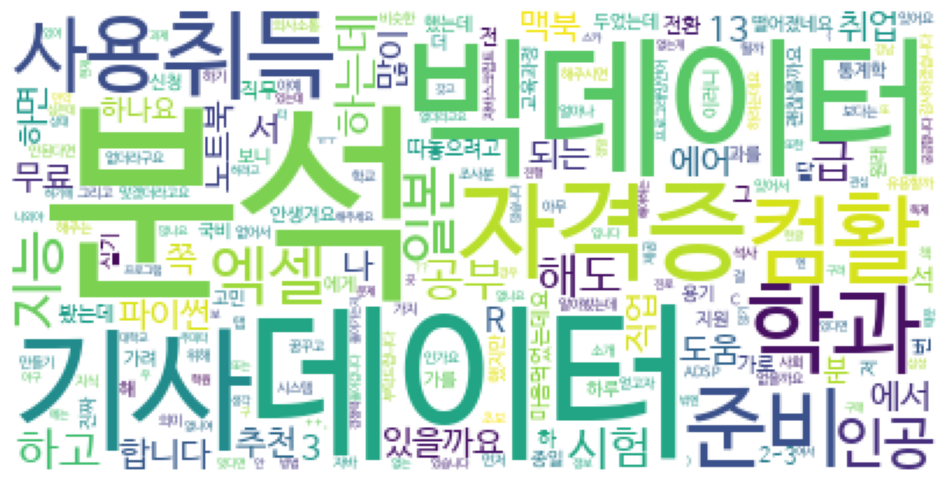

In [29]:
from wordcloud import WordCloud
data = ko.vocab().most_common(300)
print(data)
wordcloud = WordCloud(font_path='./python_machine_learning/data/NanumBarunGothic.ttf',
                      relative_scaling = 0.5,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 연관 단어 추출

In [30]:
# 연관 단어 추출

print(present_text)

컴활 못하는데 데이터분석가 데이터분석가로 직무전환하려고 마음먹었는데요 그전에 컴활 1급 실기 따놓으려고 2~3달 공부하고 6번 시험봤는데 다 떨어졌네요 진짜 하루종일 공부했는데.. 데이터분석 국비지원 신청해두었는데 컴활이 이러니 용기가 안생겨요. 컴활 못해도 데이터분석은 할 수 있을까요?
빅데이터 분석가 고3 학과 고민중인데 인공지능학과에서 빅데이터 분석가를 준비해도 괜찮을까요? 원래 통계학과를 가려했지만 교육과정을 보니 인공지능학과가 저에게 더 맞겠더라고요. 인공지능 시스템을 만들기 보다는 데이터를 가지고 의사소통하는 걸 꿈꾸고 있어요. 데이터학과도 알아봤는데 많이 없더라구요
빅데이터 분석기사 일본 취업 빅데이터 분석기사, 사회조사분석사 2급을 취득하면 일본 취업에 있어서 유용할까요? 의미가 없을까요? 안된다면 일본의 비슷한 자격증을 소개해주시면 감사하겠습니다
빅데이터분석기사 자격증을 준비하려는데요. 아무 지식이 없어서 도움을 얻고자 합니다. 빅데이터분석기사 자격증을 준비하기 위해서 ADSP나... 자격증을 먼저 취득하면 빅데이터분석기사 자격증을 취득하는데 도움이 얼마나 될까요? 그리고 빅데이터분석기사 초보 책 추천부탁드립니다.
빅데이터분석에 사용되는 프로그래밍언어가 파이썬, R, C++, 자바, 자바스크립트인가요?
엑셀 데이터분석 학교에서 무료로 제공해주는 엑셀 사용중인데 데이터분석 탭이 아예 없더라고요ㅠㅜ 무료 엑셀엔 없는 경우가 많나요?? 만약 없는게 맞다면 엑셀을 구매하는 방법밖엔 없나여?
고1 데이터 분석 맥북 에어13 고1 입니다. 데이터 분석 쪽으로 진로를 생각하고 있습니다. 현재 삼성 노트북을 사용 중인데 구려서 주피터 노트북이 잘 안돌아갑니다. 맥북 에어13 데이터 분석하기에 문제 없나요? 또한 한글(구독제)을 사용해야하는 과제가 많기 때문에 프로그램이 잘 돌아가는지 궁금합니다.
야구 스카우터나 데이터 분석 하는 직업을 갖고 싶은데 어떤 학과를 나와야 하나요? 또, 대학교 추천도 해주세요
빅데이터분석기사에 관심이 많습니다 ... 제가 컴활은 

In [35]:

from gensim.models import word2vec
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []

    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])

    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)


컴활 못 하다 데이터 분석 데이터 분석 가로 직무 전환 하 려고 마음먹다 그 전 컴활 1 급 실기 따다 2~3 달 공부 6 번 시험 보다 다 떨어지다 진짜 하루 종일 공부 하다 데이터 분석 국비 지원 신청 하다 두다 컴활 이러니 용기 안생겨요 컴활 못 하다 데이터 분석 하다 수 있다
빅데이터 분석 고 3 학과 고민 중 인공 지능 학과 빅데이터 분석 가르다 준비 하다 괜찮다 원래 통계학 가다 하다 교육과정 보다 인공 지능 학과 저 더 맞다 인공 지능 시스템 만들기 데이터 가지 의사소통 하다 걸 꿈꾸다 있다 데이터 학과 알아보다 많이 없다
빅데이터 분석 기사 일본 취업 빅데이터 분석 기사 사회 조사분 석사 2 급 취득 하다 일본 취업 있다 유용하다 요 의미 없다 안되다 일본 비슷하다 자격증 소개 해주다 감사하다
빅데이터 분석 기사 자격증 준비 하다 아무 지식 없다 도움 얻다 하다 빅데이터 분석 기사 자격증 준비 하다 위해 ADSP 나 자격증 먼저 취득 하다 빅데이터 분석 기사 자격증 취득 하다 도움 얼마나 되다 요 그리고 빅데이터 분석 기사 초보 책 추천 부탁드리다
빅데이터 분석 사용 되다 프로그래밍언어 파이썬 R C 자바 자바스크립트
엑셀 데이터 분석 학교 무료 제공 해주다 엑셀 사용 중 데이터 분석 탭 아예 없다 ㅠㅜ 무료 엑셀 없다 경우 많다 만약 없다 맞다 엑셀 구매 하다 방법 없다
고 1 데이터 분석 맥북 에어 13 고 1 이다 데이터 분석 쪽 진로 생각 있다 현재 삼성 노트북 사용 중 구려 주피터 노트북 자다 안 돌아가다 맥북 에어 13 데이터 분석 하다 문제 없다 또한 한글 구 독제 사용 하다 과제 많다 때문 프로그램 자다 돌아가다 궁금하다
야구 스카 우 터 데이터 분석 하다 직업 갖다 싶다 어떻다 학과 나오다 하나요 또 대학교 추천 해주다
빅데이터 분 석 기사 관심 많다 제 컴활 취득 상태 빅데이터 분 석 기사 경쟁력 있다 보 취득 하다 하다 빅데이터 분석 기사 시험 파이썬 또는 R 로 진행 되다 강남 쪽 학원 정말 많이 있다 빅데이터 분석 기사 자

In [38]:
data_file = 'moon.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
    data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, vector_size=200, window=10, hs=1,min_count=2, sg=1)
model.save('moon.model')
model = word2vec.Word2Vec.load("moon.model")
model.wv.most_similar(positive=['데이터'])

[('분석', 0.28501275181770325),
 ('맞다', 0.22073525190353394),
 ('분', 0.2178267240524292),
 ('없다', 0.21362659335136414),
 ('못', 0.19199280440807343),
 ('석', 0.18989671766757965),
 ('취득', 0.18984001874923706),
 ('직업', 0.1858011931180954),
 ('자다', 0.17659908533096313),
 ('13', 0.17435555160045624)]